In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.colors import hsv_to_rgb

Самостоятельное задание. Сделать цветовую сегментацию выданного изображения. Пороги для цветовой сегментации подобрать в ручную, используя преобразование изображения в формат LAB.

In [2]:

# Загрузка изображения
image = cv.imread('apple.jpg')

# Преобразование изображения в цветовое пространство Lab

lab_image = cv.cvtColor(image, cv.COLOR_BGR2LAB)
rgb_image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

def segmentate(l_h, l_s, l_v, h_h, h_s, h_v):    
    lower_threshold = np.array([l_h,l_s,l_v])
    upper_threshold = np.array([h_h,h_s,h_v])
    lo_square = np.full((10, 10, 3), lower_threshold, dtype=np.uint8) / 255.0
    do_square = np.full((10, 10, 3), upper_threshold, dtype=np.uint8) / 255.0

    mask = cv.inRange(lab_image, lower_threshold, upper_threshold)

    result = cv.bitwise_and(rgb_image, rgb_image, mask=mask)
    kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (10,10))

    plt.figure(figsize=(15,20))
    plt.subplot(1, 3, 1)
    plt.imshow(rgb_image)
    plt.subplot(1, 3, 2)
    plt.imshow(mask)
    plt.subplot(1, 3, 3)
    plt.imshow(result)
    plt.show()

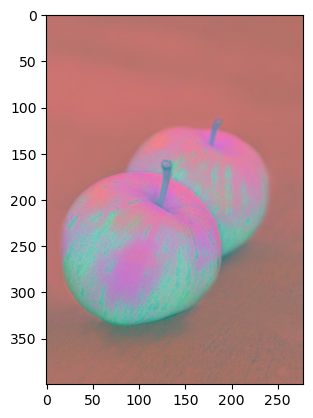

In [3]:
plt.imshow( lab_image)

In [4]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [54]:
lower_blue = np.array([0, 0, 0])
upper_blue = np.array([255, 255, 130])

lo_square = np.full((10, 10, 3), lower_blue, dtype=np.uint8) / 255.0
do_square = np.full((10, 10, 3), upper_blue, dtype=np.uint8) / 255.0

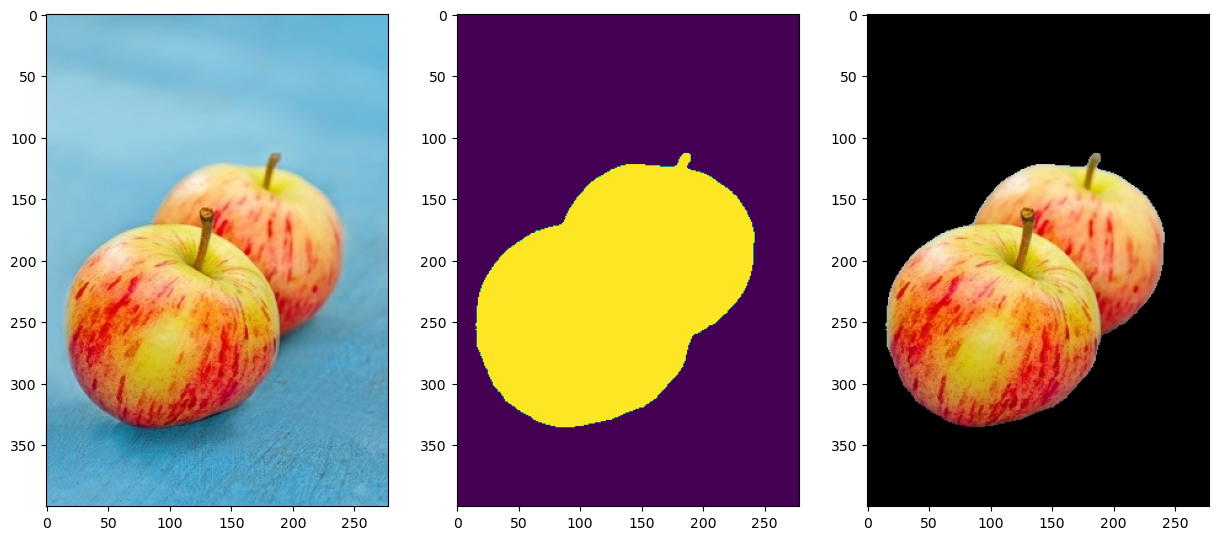

In [58]:
mask = cv.inRange(lab_image, lower_blue, upper_blue)

# Инвертирование маски
inverse_mask = cv.bitwise_not(mask)

# Применение инвертированной маски к исходному изображению
result = cv.bitwise_and(rgb_image, rgb_image, mask=inverse_mask)

plt.figure(figsize=(15, 20))
plt.subplot(1, 3, 1)
plt.imshow(rgb_image)
plt.subplot(1, 3, 2)
plt.imshow(inverse_mask)
plt.subplot(1, 3, 3)
plt.imshow(result)
plt.show()